In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [107]:
#plotting style
sns.set(style = 'whitegrid')

In [108]:
#Loading data
sentiment = pd.read_csv('/fear_greed_index.csv')
Trader = pd.read_csv('/historical_data.csv')

#preview datasets
print("Sentiment Data")
display(sentiment.head())

print("Trader Data")
display(Trader.head())

Sentiment Data


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Trader Data


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [109]:
#Extracting date
Trader['time'] = pd.to_datetime(Trader['Timestamp'], unit='ms')
Trader['date'] = Trader['time'].dt.date
Trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [110]:
#Date Columns
sentiment['Date'] = pd.to_datetime(sentiment['date'], errors = 'coerce')
Trader['time'] = pd.to_datetime(Trader['Timestamp'], errors = 'coerce', unit='ms')
Trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [111]:
#check nulls
print("Sentiment Nulls")
display(sentiment.isnull().sum())

print("Trader Nulls")
display(Trader.isnull().sum())

Sentiment Nulls


,0
timestamp,0
value,0
classification,0
date,0
Date,0


Trader Nulls


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [112]:
#creating merging keys
sentiment['Date'] = sentiment['Date'].dt.date
Trader['Date'] = Trader['time'].dt.date

In [113]:
#Merge on date
merged = pd.merge(Trader, sentiment, left_on = 'Date', right_on = 'Date', how = 'left')
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,time,date_x,Date,timestamp,value,classification,date_y
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,2024-10-27,1.730007e+09,74.0,Greed,2024-10-27


In [125]:
#save merged data
merged.to_csv('C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV Files\\merged.csv', index = False, encoding='utf-8-sig')

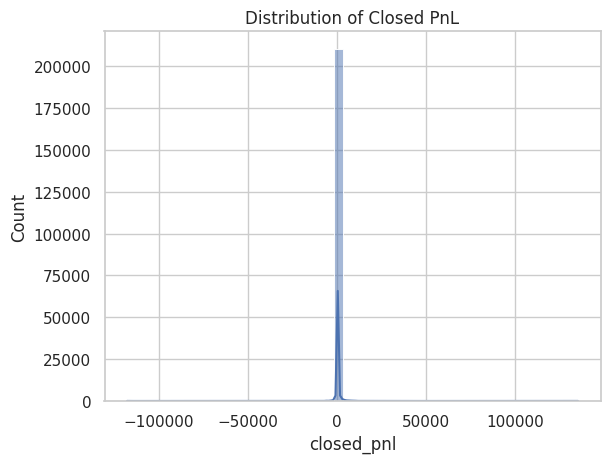

In [126]:
## Distribution of Closed PnL

merged.columns = merged.columns.str.strip().str.lower().str.replace(' ', '_')

sns.histplot(merged['closed_pnl'], bins=50, kde=True)
plt.title("Distribution of Closed PnL")
plt.savefig("C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV Files\\pnl_distribution.png")
plt.show()

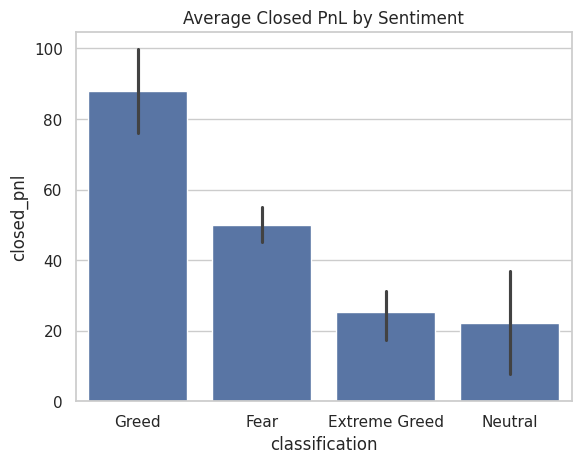

In [127]:
# Average Closed PnL by Sentiment
merged.columns = merged.columns.str.strip().str.lower().str.replace(' ', '_')

sns.barplot(data=merged, x='classification', y='closed_pnl')
plt.title("Average Closed PnL by Sentiment")
plt.savefig("C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV Files\\pnl_by_sentiment.png")
plt.show()

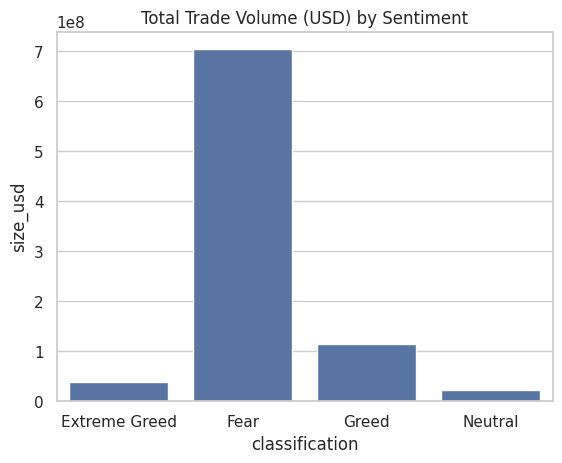

In [128]:
# Total Volume (USD) by Sentiment
volume_stats = merged.groupby('classification')['size_usd'].sum().reset_index()

sns.barplot(data=volume_stats, x='classification', y='size_usd')
plt.title("Total Trade Volume (USD) by Sentiment")
plt.savefig("C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV File\\volume_by_sentiment.png")
plt.show()

In [129]:
from google.colab import files
files.download('C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV Files\\merged.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
#download images
from google.colab import files
files.download('C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV Files\\pnl_distribution.png')
files.download('C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV Files\\pnl_by_sentiment.png')
files.download('C:\\Users\\ASUS\\Desktop\\ds_Anant Gupta\\CSV Files\\volume_by_sentiment.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
avg_pnl = merged.groupby('classification')['closed_pnl'].mean().reset_index()
print(avg_pnl)

  classification  closed_pnl
0  Extreme Greed   25.418772
1           Fear   50.047622
2          Greed   87.894859
3        Neutral   22.229713


In [132]:
volume_by_sentiment = merged.groupby('classification')['size_usd'].sum().reset_index()
print(volume_by_sentiment)

  classification      size_usd
0  Extreme Greed  3.940677e+07
1           Fear  7.041585e+08
2          Greed  1.155037e+08
3        Neutral  2.184323e+07
